### Hipótesis
Las hipótesis que os planteamos para el conjunto de datos de historico_tickets_limpio_pandas son:

- Tiempo de resolución: Se podría hipotetizar que los tickets con mayor severidad y prioridad son resueltos en menos días que los tickets con menor prioridad. Además, se podría examinar si hay alguna correlación entre el tipo de problema y el tiempo que toma resolverlo.
    - La pregunta que contestaremos es: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?

- Satisfacción del cliente: Se podría hipotetizar que la satisfacción del cliente está relacionada con la velocidad de resolución del ticket y la categoría del problema. Por ejemplo, los clientes podrían estar más satisfechos si sus problemas de acceso y login se resuelven rápidamente en comparación con los problemas de software más complejos.
    - La pregunta que contestaremos es: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?

- Desempeño del agente: Se podría hipotetizar que algunos agentes tienen un mejor desempeño que otros en la resolución de tickets. Se podrían explorar variables como el número de tickets asignados, el tiempo promedio de resolución y la satisfacción del cliente para identificar patrones en el desempeño de los agentes.
    - La pregunta que contestaremos es: ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?

- Cambios en el tiempo: Se podría hipotetizar que el volumen y la naturaleza de los problemas cambian con el tiempo. Por ejemplo, se podría explorar si hay un aumento en los problemas de acceso y login durante un determinado período de tiempo, o si hay una correlación entre la temporada del año y el tipo de problema reportado.
    - La pregunta que contestaremos es: ¿Hay alguna diferencia entre a lo largo del tiempo entre las distintas categorías de solicitudes de tickets que tenemos?

-------------------------------------------------------------------------

### Objetivos
1- Haced una exploración inicial del dataframe:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('datos/historico_tickets_limpio_pandas.csv', index_col = 0)
df.sample(3)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
16910,SDLENR-2044139253,2020-11-04,905,32,Acceso/Login,Problema,2 - Normal,0 - Sin Asignar,0,4,2º semestre,2020,Noviembre
6493,GMLTER-9544131668,2020-10-27,1306,16,Hardware,Solicitud,2 - Normal,2 - Media,12,5,2º semestre,2020,Octubre
11665,KWLTER-4143764668,2019-10-26,1666,36,Hardware,Solicitud,2 - Normal,1 - Baja,11,3,2º semestre,2019,Octubre


- ¿Cuál es el número de filas y columnas?

In [7]:
df.shape

(97386, 13)

- ¿Cuál es el porcentaje de valores nulos en cada columna? Presenta los resultados en un dataframe, donde las columnas sean el nombre de las variables y el porcentaje de nulos.

In [8]:
df.isnull().sum()/df.shape[0]*100

id_ticket          0.0
fecha              0.0
id_empleado        0.0
id_agente          0.0
categoría          0.0
tipo               0.0
severidad          0.0
prioridad          0.0
días_resolución    0.0
satisfacción       0.0
semestre           0.0
año                0.0
mes                0.0
dtype: float64

In [19]:
df.duplicated().sum()

0

- ¿Qué tipos de datos hay en cada columna?

In [10]:
df.sample(3)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
9266,SHLTSR-4542449616,2016-03-20,931,46,Sistema,Solicitud,2 - Normal,3 - Alta,10,4,1 semestre,2016,Marzo
6073,KHLTSR-3742597302,2016-08-15,1260,43,Sistema,Solicitud,2 - Normal,3 - Alta,7,4,2º semestre,2016,Agosto
6536,KHLTNR-4043039011,2017-10-31,1991,20,Acceso/Login,Solicitud,2 - Normal,3 - Alta,0,3,2º semestre,2017,Octubre


In [9]:
df.dtypes

id_ticket          object
fecha              object
id_empleado         int64
id_agente           int64
categoría          object
tipo               object
severidad          object
prioridad          object
días_resolución     int64
satisfacción        int64
semestre           object
año                 int64
mes                object
dtype: object

- Extraed la información general del dataframe.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_empleado,97386.0,999.160639,577.407222,1.0,500.0,999.0,1499.0,2000.0
id_agente,97386.0,25.468856,14.449455,1.0,13.0,26.0,38.0,50.0
días_resolución,97386.0,4.552749,4.365432,0.0,0.0,4.0,7.0,21.0
satisfacción,97386.0,4.100990,1.257093,1.0,4.0,5.0,5.0,5.0
año,97386.0,2018.399164,1.393095,2016.0,2017.0,2019.0,2020.0,2020.0


In [15]:
df.describe(include='object')

,id_ticket,fecha,categoría,tipo,severidad,prioridad,semestre,mes
count,97386,97386,97386,97386,97386,97386,97386,97386
unique,97386,1827,4,2,5,4,2,12
top,GDDENR-5042564453,2020-02-20,Sistema,Solicitud,2 - Normal,3 - Alta,2º semestre,Octubre
freq,1,105,38961,73138,88555,35511,49876,8487


/home/paloma/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='días_resolución'>

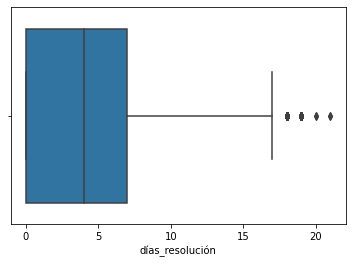

In [18]:
sns.boxplot(df['días_resolución'])

- Nuestro DataFrame tiene 13 columnas y 97386 filas.

- Nuestros datos son de tipo object y de tipo integer. Pensamos que quizá la columna 'fecha', que es tipo object y consideramos que debería ser de tipo 'datetime'.

- No tenemos nulos en nuestros datos ni valores duplicados.

- Examinando los estadísticos numéricos hemos detectado la posible existencia de outliers analizando la diferencia entre el cuartil 75 y el valor máximo para la columna nivel de satifacción, lo cual hemos confirmado con un boxplot.

2- Cread dos dataframes nuevos, uno que incluya solo las variables categóricas y otro que incluya solo las variables numéricas.

In [22]:
df_cat = df.select_dtypes(include = 'object')
df_cat.sample(3)

,id_ticket,fecha,categoría,tipo,severidad,prioridad,semestre,mes
6108,KHLTSR-4842477206,2016-04-17,Sistema,Solicitud,2 - Normal,3 - Alta,1 semestre,Abril
12355,KHLTET-7244123238,2020-10-19,Software,Solicitud,2 - Normal,3 - Alta,2º semestre,Octubre
16986,SDLENR-9144118812,2020-10-14,Acceso/Login,Problema,2 - Normal,0 - Sin Asignar,2º semestre,Octubre


In [24]:
df_num = df.select_dtypes(include = 'int64')
df_num.sample(3)

,id_empleado,id_agente,días_resolución,satisfacción,año
26079,50,25,1,1,2020
17968,1321,36,0,5,2018
9607,1229,21,4,4,2018


- ¿Cuáles son los principales estádisticos de los dataframes?

In [25]:
df_cat.describe()

,id_ticket,fecha,categoría,tipo,severidad,prioridad,semestre,mes
count,97386,97386,97386,97386,97386,97386,97386,97386
unique,97386,1827,4,2,5,4,2,12
top,GDDENR-5042564453,2020-02-20,Sistema,Solicitud,2 - Normal,3 - Alta,2º semestre,Octubre
freq,1,105,38961,73138,88555,35511,49876,8487


In [27]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
id_empleado,97386.0,999.160639,577.407222,1.0,500.0,999.0,1499.0,2000.0
id_agente,97386.0,25.468856,14.449455,1.0,13.0,26.0,38.0,50.0
días_resolución,97386.0,4.552749,4.365432,0.0,0.0,4.0,7.0,21.0
satisfacción,97386.0,4.100990,1.257093,1.0,4.0,5.0,5.0,5.0
año,97386.0,2018.399164,1.393095,2016.0,2017.0,2019.0,2020.0,2020.0


In [31]:
df_num[['días_resolución', 'satisfacción']].mode()

,días_resolución,satisfacción
0,0,5


- Extraed los valores únicos.

In [38]:
for col in df_cat.columns[2:]:
    print(df_cat[col].unique())

['Acceso/Login' 'Sistema' 'Software' 'Hardware']
['Problema' 'Solicitud']
['0 - Sin Clasificar' '2 - Normal' '4 - Crítico' '3 - Mayor' '1 - Menor']
['0 - Sin Asignar' '3 - Alta' '2 - Media' '1 - Baja']
['2º semestre' '1 semestre']
['Julio' 'Mayo' 'Junio' 'Abril' 'Agosto' 'Marzo' 'Enero' 'Septiembre'
 'Octubre' 'Diciembre' 'Noviembre' 'Febrero']


In [40]:
valores_cat = [df_cat[col].unique() for col in df_cat.columns[2:]]

In [43]:
valores_cat

[array(['Acceso/Login', 'Sistema', 'Software', 'Hardware'], dtype=object),
 array(['Problema', 'Solicitud'], dtype=object),
 array(['0 - Sin Clasificar', '2 - Normal', '4 - Crítico', '3 - Mayor',
        '1 - Menor'], dtype=object),
 array(['0 - Sin Asignar', '3 - Alta', '2 - Media', '1 - Baja'],
       dtype=object),
 array(['2º semestre', '1 semestre'], dtype=object),
 array(['Julio', 'Mayo', 'Junio', 'Abril', 'Agosto', 'Marzo', 'Enero',
        'Septiembre', 'Octubre', 'Diciembre', 'Noviembre', 'Febrero'],
       dtype=object)]

In [39]:
for col in df_num.columns[2:]:
    print(df_num[col].unique())

[ 0  3  9  1  2  5  8  4 10  6  7 13 16 17 11 12 14 15 19 18 21 20]
[5 1 4 3 2]
[2016 2017 2018 2019 2020]


In [44]:
valores_num = [df_num[col].unique() for col in df_num.columns[2:]]

In [45]:
valores_num

[array([ 0,  3,  9,  1,  2,  5,  8,  4, 10,  6,  7, 13, 16, 17, 11, 12, 14,
        15, 19, 18, 21, 20]),
 array([5, 1, 4, 3, 2]),
 array([2016, 2017, 2018, 2019, 2020])]

BONUS presenta los resultados en un dataframe. Os deberá quedar algo como esto:

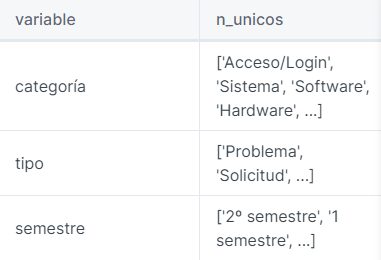

In [55]:
valores_cat[1]

array(['Problema', 'Solicitud'], dtype=object)

In [68]:
dicc_cat = {}
for col in df_cat.columns[2:]:
    dicc_cat[col] = df_cat[col].unique()

In [69]:
dicc_cat

{'categoría': array(['Acceso/Login', 'Sistema', 'Software', 'Hardware'], dtype=object),
 'tipo': array(['Problema', 'Solicitud'], dtype=object),
 'severidad': array(['0 - Sin Clasificar', '2 - Normal', '4 - Crítico', '3 - Mayor',
        '1 - Menor'], dtype=object),
 'prioridad': array(['0 - Sin Asignar', '3 - Alta', '2 - Media', '1 - Baja'],
       dtype=object),
 'semestre': array(['2º semestre', '1 semestre'], dtype=object),
 'mes': array(['Julio', 'Mayo', 'Junio', 'Abril', 'Agosto', 'Marzo', 'Enero',
        'Septiembre', 'Octubre', 'Diciembre', 'Noviembre', 'Febrero'],
       dtype=object)}

In [77]:
df_cat_unicos = pd.DataFrame(columns=['variable', 'n_unicos'])

SyntaxError: positional argument follows keyword argument (124313713.py, line 1)

In [78]:
df_cat_unicos['variable'] = dicc_cat.keys()

In [80]:
df_cat_unicos['n_unicos'] = dicc_cat.values()

In [81]:
df_cat_unicos

,variable,n_unicos
0,categoría,"[Acceso/Login, Sistema, Software, Hardware]"
1,tipo,"[Problema, Solicitud]"
2,severidad,"[0 - Sin Clasificar, 2 - Normal, 4 - Crítico, ..."
3,prioridad,"[0 - Sin Asignar, 3 - Alta, 2 - Media, 1 - Baja]"
4,semestre,"[2º semestre, 1 semestre]"
5,mes,"[Julio, Mayo, Junio, Abril, Agosto, Marzo, Ene..."


Donde variable es cada una de las variables categóricas que tenemos en el dataset y n_unicos es una lista con los nombres de los valores únicos de cada variable.

--------------------------------------------------------------------

### Conclusiones
De qué nos sirven estos números y dataframe? Extraed conclusiones de ellos.

Por ejemplo:

- ¿Hay alguna columna que no tenga sentido su tipo de datos?

Pensamos que habría que cambiar el tipo de fecha.

- ¿Hay alguna columna que no tenga sentido su nombre

Con lo que sabemos del dataframe, consideramos que todos los nombre sde la columna representan los datos que contienen. No obstante, no nos queda clara la diferencia entre 'id_empleado' e 'id_agente' y la función que cumple cada uno.

- ¿Hay alguna columna que no tenga sentido su contenido?

Consideramos que los datos recogidos tienen sentido y son relevantes. No instante, quizá las columans mes y año sean redundantes teniendo en cuenta que tenemos ya un dato con la fecha completa de la cual podemos extraer dicha información.

- ¿Hay alguna columna que tenga demasiadas categorías o valores que nos pueda hacer difícil trabajar con ella?

La variable severidad quizá podría ser recortada.